In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from masterthesis.utils import CEFR_LABELS, ROUND_CEFR_LABELS, heatmap, IMG_DIR, RESULTS_DIR

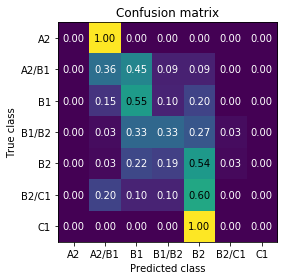

In [3]:
r = pickle.load((RESULTS_DIR / 'mlp_mixed-02-20_14-45-16.pkl').open('rb'))

cm = confusion_matrix(y_pred=r.predictions, y_true=r.true)

heatmap(cm, CEFR_LABELS, CEFR_LABELS, normalize=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class');
plt.tight_layout()
# plt.savefig((IMG_DIR / 'mlp-mixed-conf.pdf').open('wb'))

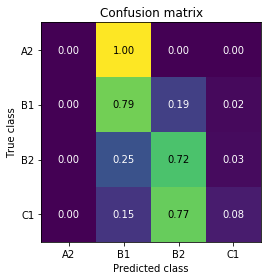

In [4]:
r = pickle.load((RESULTS_DIR / 'mlp_mixed-02-22_13-43-37.pkl').open('rb'))

cm = confusion_matrix(y_pred=r.predictions, y_true=r.true)

heatmap(cm, ROUND_CEFR_LABELS, ROUND_CEFR_LABELS, normalize=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class');
plt.tight_layout()
# plt.savefig((IMG_DIR / 'mlp-mixed-conf-round.pdf').open('wb'))